In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os 
data_path = os.path.join("..", "data", "Supplementary Information File 1 (SIF-1).xlsx")
print (data_path)
# os.listdir(data_path)

..\data\Supplementary Information File 1 (SIF-1).xlsx


In [3]:

df = pd.read_excel(data_path)
df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1,Ac2O3,Ac,Ac,False,cubic,element not in BV,element not in BV,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000
1,2,AcAgO3,Ac,Ag,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571
2,3,AcAlO3,Ac,Al,False,cubic,element not in BV,element not in BV,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714
3,4,AcAsO3,Ac,As,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429
4,5,AcAuO3,Ac,Au,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               5329 non-null   int64  
 1   Compound           5329 non-null   object 
 2   A                  5329 non-null   object 
 3   B                  5329 non-null   object 
 4   In literature      5329 non-null   bool   
 5   Lowest distortion  5329 non-null   object 
 6   v(A)               5329 non-null   object 
 7   v(B)               5329 non-null   object 
 8   r(AXII)(Å)         5329 non-null   float64
 9   r(AVI)(Å)          5329 non-null   float64
 10  r(BVI)(Å)          5329 non-null   float64
 11  EN(A)              5329 non-null   float64
 12  EN(B)              5329 non-null   float64
 13  l(A-O)(Å)          5329 non-null   float64
 14  l(B-O)(Å)          5329 non-null   float64
 15  ΔENR               5329 non-null   float64
 16  tG                 5329 

In [5]:
data=df.copy()

In [6]:
# Drop the rows of "Lowest distortion" == "-"
data=data[data['Lowest distortion'] != "-"] 

In [7]:
# drop the compound, A, B, In literature, s.no
data.drop(['S.No', 'Compound', 'v(A)', 'v(B)',
            'A', 'B', 'In literature' , 'τ' ],
              axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 0 to 5328
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lowest distortion  5276 non-null   object 
 1   r(AXII)(Å)         5276 non-null   float64
 2   r(AVI)(Å)          5276 non-null   float64
 3   r(BVI)(Å)          5276 non-null   float64
 4   EN(A)              5276 non-null   float64
 5   EN(B)              5276 non-null   float64
 6   l(A-O)(Å)          5276 non-null   float64
 7   l(B-O)(Å)          5276 non-null   float64
 8   ΔENR               5276 non-null   float64
 9   tG                 5276 non-null   float64
 10  μ                  5276 non-null   float64
dtypes: float64(10), object(1)
memory usage: 494.6+ KB


In [8]:
data.head()

,Lowest distortion,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
0,cubic,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,0.800000
1,orthorhombic,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,0.678571
2,cubic,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,0.385714
3,orthorhombic,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,0.371429
4,orthorhombic,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,0.664286


In [9]:
# send the lowest distortion column at the end
distortion= data['Lowest distortion']

# move the column to the end
data = data.drop(['Lowest distortion'], axis=1)#.join(distortion)


In [10]:
data.head()

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,0.800000
1,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,0.678571
2,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,0.385714
3,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,0.371429
4,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,0.664286


In [11]:
data.describe()

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
count,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000,5276.000000
mean,0.975038,0.825679,0.815317,1.573211,1.575324,2.290079,2.011475,-2.194221,0.766848,0.582370
std,0.337024,0.244605,0.243546,0.449922,0.448241,0.663045,0.594176,0.661116,0.135688,0.173961
min,0.270000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,0.192857
25%,0.690000,0.630000,0.630000,1.200000,1.200000,2.290644,1.956808,-2.599286,0.669561,0.450000
50%,0.930000,0.800000,0.770000,1.550000,1.550000,2.393444,2.096141,-2.098589,0.757121,0.550000
75%,1.180000,0.950000,0.950000,1.930000,1.930000,2.571812,2.286435,-1.710080,0.851209,0.678571
max,1.880000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.388809,1.192857


In [12]:
data.isnull().sum()

r(AXII)(Å)    0
r(AVI)(Å)     0
r(BVI)(Å)     0
EN(A)         0
EN(B)         0
l(A-O)(Å)     0
l(B-O)(Å)     0
ΔENR          0
tG            0
μ             0
dtype: int64

In [13]:
distortion

0              cubic
1       orthorhombic
2              cubic
3       orthorhombic
4       orthorhombic
            ...     
5324           cubic
5325           cubic
5326    orthorhombic
5327           cubic
5328           cubic
Name: Lowest distortion, Length: 5276, dtype: object

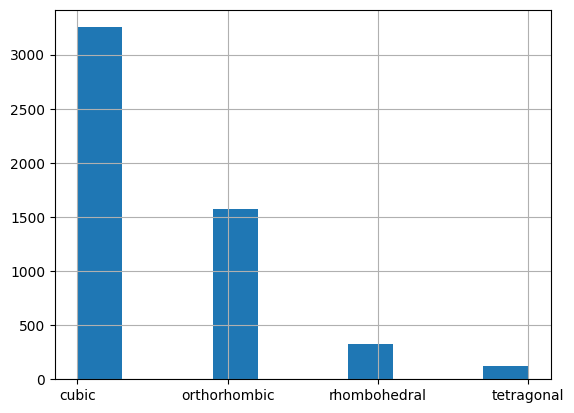

In [14]:
distortion.hist()
plt.style.use('ggplot')


In [15]:
# correlations= data.corr()
# f,ax = plt.subplots(figsize=(12,9))
# sns.heatmap(correlations,annot=True)

## Test Train split

In [16]:
from sklearn.model_selection import train_test_split
X = data
y = distortion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108)

## Random Forest

In [17]:
# Random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
def RF_Model (X_train, y_train , norm_func = None):
    if norm_func is None:
        norm_func = lambda x : x    # noqa: E731

    model = RandomForestClassifier(n_estimators=1400, max_depth=40, #max_features='auto',
                                criterion='entropy', min_samples_leaf=1, min_samples_split=2,
                                    random_state=108)
    model.fit(X_train, y_train)
    return model

In [18]:
RF_model = RF_Model(X_train, y_train)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
y_pred

              precision    recall  f1-score   support

       cubic       0.84      0.88      0.86       655
orthorhombic       0.67      0.72      0.70       312
rhombohedral       0.56      0.21      0.30        67
  tetragonal       0.26      0.23      0.24        22

    accuracy                           0.77      1056
   macro avg       0.59      0.51      0.53      1056
weighted avg       0.76      0.77      0.76      1056



array(['cubic', 'cubic', 'cubic', ..., 'cubic', 'cubic', 'cubic'],
      dtype=object)

In [19]:
RF_model.score(X_test, y_test)

0.7736742424242424

## Feature importance


In [20]:
# importance= model.feature_importances_

# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [22]:
DT_model = DecisionTreeClassifier()

In [23]:
DT_model.fit(X_train,y_train)
DT_model.score(X_test,y_test)

0.709280303030303

Feature: 0, Score: 0.05836
Feature: 1, Score: 0.09192
Feature: 2, Score: 0.09197
Feature: 3, Score: 0.10127
Feature: 4, Score: 0.10462
Feature: 5, Score: 0.05538
Feature: 6, Score: 0.08239
Feature: 7, Score: 0.18763
Feature: 8, Score: 0.19294
Feature: 9, Score: 0.03352


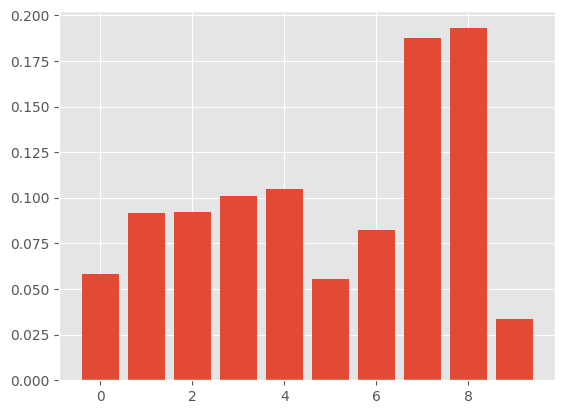

In [24]:
importance = DT_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [25]:
predictions = DT_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       cubic       0.83      0.81      0.82       655
orthorhombic       0.59      0.64      0.61       312
rhombohedral       0.23      0.19      0.21        67
  tetragonal       0.27      0.36      0.31        22

    accuracy                           0.71      1056
   macro avg       0.48      0.50      0.49      1056
weighted avg       0.71      0.71      0.71      1056



In [27]:
print(confusion_matrix(y_test,predictions))

[[529  97  19  10]
 [ 85 199  22   6]
 [ 13  35  13   6]
 [  7   5   2   8]]


## K Fold validation

In [28]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 5)

In [29]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [30]:
X = data.to_numpy()
y = distortion.to_numpy()

In [31]:
print(f"Data : {X.shape} \nLabel: {y.shape}\n")
for train , val in kfold.split(X, y):
    print(f"Train: {train.shape} \nTest : {val.shape}\nTotal: {train.shape[0] + val.shape[0]}\n")
    print(f"data : {X[train].shape} \nlabel: {y[val].shape}\n")

Data : (5276, 10) 
Label: (5276,)

Train: (4220,) 
Test : (1056,)
Total: 5276

data : (4220, 10) 
label: (1056,)

Train: (4221,) 
Test : (1055,)
Total: 5276

data : (4221, 10) 
label: (1055,)

Train: (4221,) 
Test : (1055,)
Total: 5276

data : (4221, 10) 
label: (1055,)

Train: (4221,) 
Test : (1055,)
Total: 5276

data : (4221, 10) 
label: (1055,)

Train: (4221,) 
Test : (1055,)
Total: 5276

data : (4221, 10) 
label: (1055,)



## XGBoost

In [32]:
import xgboost as xgb


In [33]:
def XGB_Model_func(x , y , norm_func = None , n_estimators = 100):
    if norm_func is None:
        norm_func = lambda x : x    # noqa: E731
    
    # Define the XGBoost model with a linear objective function
    xgb_model = xgb.XGBClassifier(
        # objective='reg:linear',  # Linear objective function
        max_depth=12,
        learning_rate=0.25,
        # n_estimators=n_estimators,
        # n_jobs=-1
        gamma = 0.1,
        objective = 'multi:softprob'

    )
    
    # Train the model on the training data
    xgb_model.fit(norm_func(x), y)
    
    return xgb_model

In [34]:
y_train.to_numpy()

array(['cubic', 'cubic', 'rhombohedral', ..., 'cubic', 'orthorhombic',
       'cubic'], dtype=object)

In [35]:
def to_num(y_train):
    n = y_train.shape[0]
    y_train_np = y_train.to_numpy()
    y_train_num = np.zeros((n,))
    leftout = 0
    for i in range(n):
        if y_train_np[i] == 'cubic':
            y_train_num[i] = 1
        elif y_train_np[i] == 'rhombohedral':
            y_train_num[i] = 4
        elif y_train_np[i] == 'tetragonal':
            y_train_num[i] = 2
        elif y_train_np[i] == 'orthorhombic':
            y_train_num[i] = 3
        else:
            leftout+=1

    # leftout
    
    return (y_train_num-1).astype(int)



In [36]:
y_train_num= to_num(y_train)
# show unique values
np.unique(y_train_num)

array([0, 1, 2, 3])

In [37]:
XGB_model=XGB_Model_func(X_train,y_train_num)
XGB_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
predictions = XGB_model.predict(X_test)
print(classification_report(to_num(y_test),predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       655
           1       0.36      0.36      0.36        22
           2       0.69      0.74      0.71       312
           3       0.50      0.21      0.29        67

    accuracy                           0.79      1056
   macro avg       0.60      0.55      0.56      1056
weighted avg       0.78      0.79      0.78      1056



In [39]:
from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# Create a sample multiclass imbalanced dataset
# X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_redundant=0, n_repeated=0, n_classes=5, n_clusters_per_class=1, weights=[0.1, 0.2, 0.3, 0.2, 0.2], random_state=42)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SMOTE object with k=5 and ratio=1
smote = SMOTE()

# Oversample the minority classes
X_res, y_res = smote.fit_resample(X_train, y_train)
print(f"X_res = {X_res.shape}")
print(f"y_res = {y_res.shape}/n")
# Print the new class distribution
# print("Original class distribution:", np.unique(y_train, return_counts=True))
# print("Oversampled class distribution:", np.unique(y_res, return_counts=True))

XGB_model_S = XGB_Model_func(X_res,to_num(y_res))

X_res = (10392, 10)
y_res = (10392,)/n


In [40]:
X_res

,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
0,0.870000,0.750000,0.270000,1.360000,2.040000,2.417029,1.624662,-0.967286,0.961157,0.192857
1,0.570000,0.570000,0.960000,2.200000,1.250000,2.300109,2.119701,-2.050393,0.590254,0.685714
2,0.790000,0.680000,0.780000,1.600000,2.330000,2.294004,2.362864,-1.784036,0.710350,0.557143
3,0.740000,0.680000,0.400000,1.500000,1.900000,2.293678,1.783361,-1.175571,0.840671,0.285714
4,0.580000,0.570000,0.720000,1.900000,1.600000,2.339396,1.955055,-1.661714,0.660411,0.514286
...,...,...,...,...,...,...,...,...,...,...
10387,0.821708,0.701708,0.675743,1.940842,1.510644,2.347690,1.956622,-1.757584,0.756927,0.482673
10388,1.635467,1.135467,0.831460,1.838184,2.100000,2.571274,2.115492,-2.269060,0.964703,0.593900
10389,1.124010,0.901337,0.446658,1.223316,1.592056,2.552914,1.802013,-1.643630,0.966558,0.319042
10390,1.380000,0.900000,0.486936,2.020000,1.622145,2.514402,1.840567,-1.741125,1.043142,0.347811


In [41]:
XGB_model_S

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [42]:
predictions = XGB_model_S.predict(X_test)
print(classification_report(to_num(y_test),predictions))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       655
           1       0.31      0.50      0.38        22
           2       0.69      0.73      0.71       312
           3       0.34      0.33      0.33        67

    accuracy                           0.78      1056
   macro avg       0.56      0.61      0.58      1056
weighted avg       0.79      0.78      0.78      1056



# RF with SMOTE

In [43]:
RF_model = RF_Model(X_train, y_train)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
RF_model.score(X_test, y_test)

              precision    recall  f1-score   support

       cubic       0.84      0.88      0.86       655
orthorhombic       0.67      0.72      0.70       312
rhombohedral       0.56      0.21      0.30        67
  tetragonal       0.26      0.23      0.24        22

    accuracy                           0.77      1056
   macro avg       0.59      0.51      0.53      1056
weighted avg       0.76      0.77      0.76      1056



0.7736742424242424

In [44]:
RF_model = RF_Model(X_res, y_res)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cubic       0.89      0.83      0.86       655
orthorhombic       0.67      0.74      0.70       312
rhombohedral       0.32      0.30      0.31        67
  tetragonal       0.29      0.55      0.38        22

    accuracy                           0.76      1056
   macro avg       0.54      0.60      0.56      1056
weighted avg       0.78      0.76      0.77      1056



In [45]:
RF_model.score(X_test, y_test)

0.7632575757575758